## Chicago Data Analysis

#### Why Chicago ?

According to wikipedia, Chicago overall crime rate, especially the violent crime rate is higher than the US average. Furthermore, in 2016 Chicago was responsible for nearly half increase of homicides in US

In [3]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('./data/crime_test.csv')

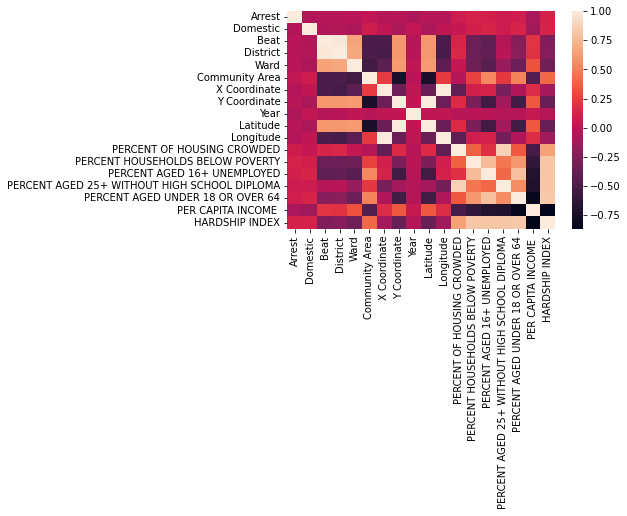

In [3]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

## Correlation between crimes and wealth

Checking if there is any relation between hardship index and crimes

<img src='https://resilient.chicago.gov/assets/img/rc/economic-hardship.png' width='70%'>

### The map of homicides
take a look that most homicides takes place where Chicago's Hardship indexes are higher 

<img src ='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Homicides_and_Trauma_Centers_in_Chicago_.svg/1920px-Homicides_and_Trauma_Centers_in_Chicago_.svg.png' width=50%>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

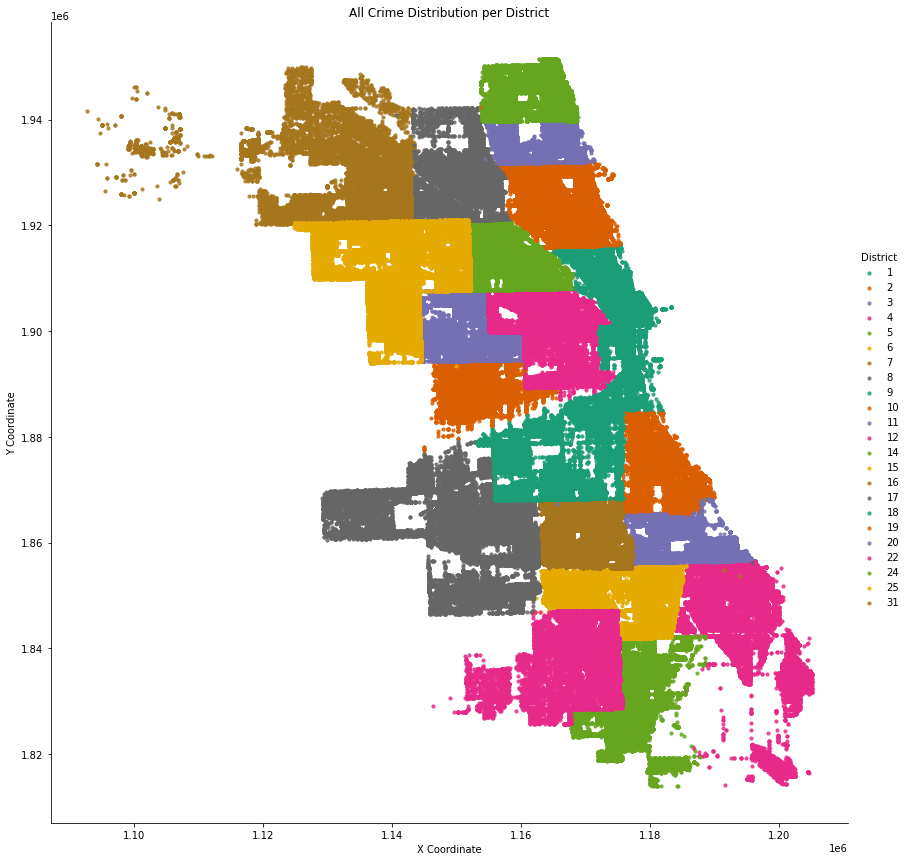

In [4]:
df_map = df.loc[(df['X Coordinate']!=0 & (df['Y Coordinate']!=0))]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df_map[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

#### Crimes per area

The plot below shows us a concentration of 'Theft' as one of the most occuring crimes in Chicago.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Crime Distribution')

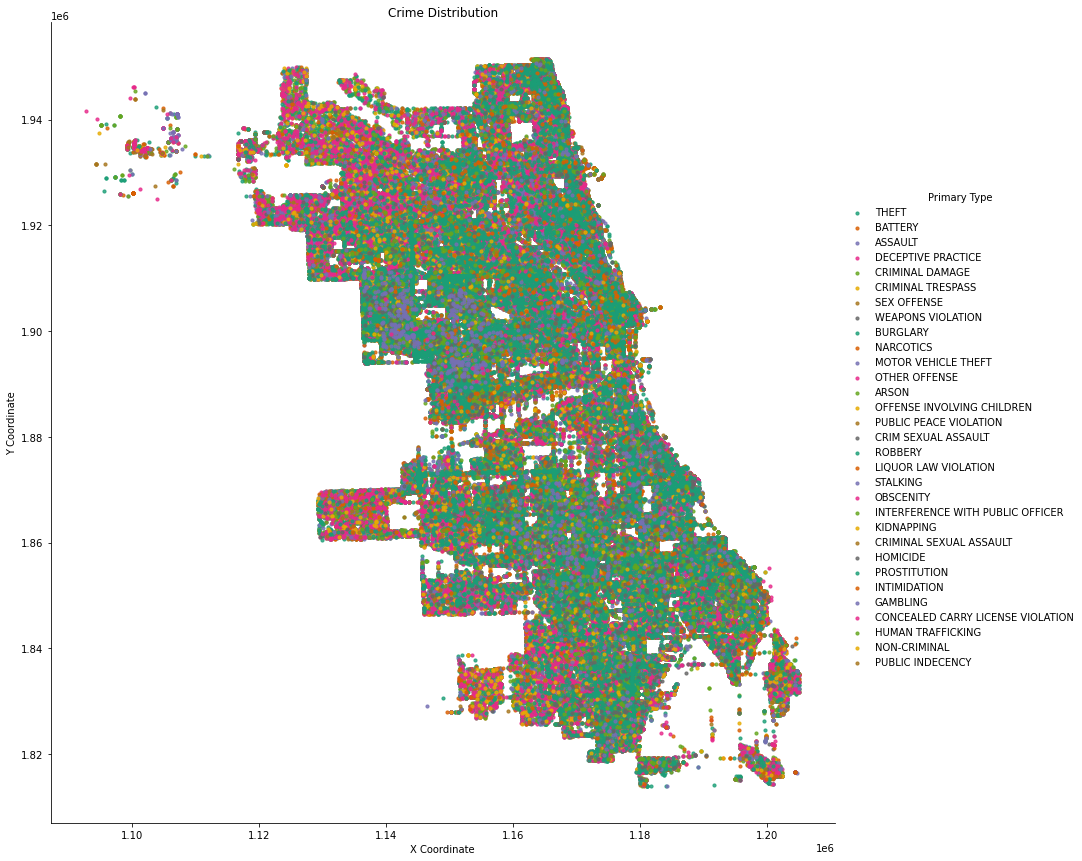

In [5]:
df_map = df.loc[(df['X Coordinate']!=0 & (df['Y Coordinate']!=0))]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df_map[:],
           fit_reg=False, 
           hue="Primary Type",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crime Distribution")

In [6]:
### Crime does have a tendency to drop as the years goes by

In [33]:
df.iloc[0]

Date                                                      2015-09-05 10:55:00
Primary Type                                                         BURGLARY
Description                                                    FORCIBLE ENTRY
Location Description                                                RESIDENCE
Arrest                                                                  False
Domestic                                                                False
Beat                                                                      614
District                                                                    6
Ward                                                                     21.0
Community Area                                                             71
X Coordinate                                                          1168430
Y Coordinate                                                          1850165
Year                                                            

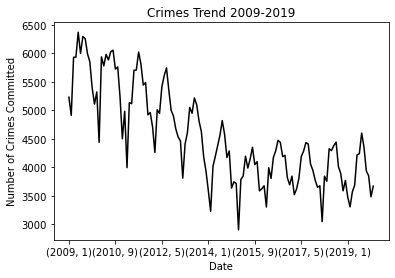

In [7]:
df.index = pd.DatetimeIndex(df.Date)
df.groupby([df.index.year, df.index.month]).size().plot(kind='line',color = ['black'])
plt.ylabel('Number of Crimes Committed')
plt.xlabel('Date')
plt.title('Crimes Trend 2009-2019')
plt.show()

In [8]:
sns.set(rc={"figure.figsize":(10, 5)})

<AxesSubplot:xlabel='count', ylabel='Location Description'>

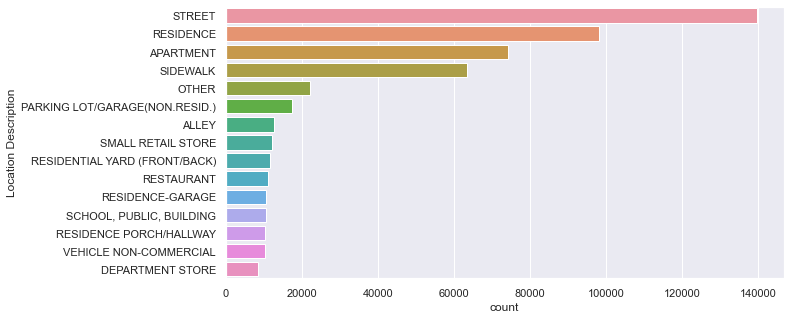

In [9]:
#Crimes by Location 
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)

In [10]:
df.columns

Index(['Date', 'Primary Type', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Location',
       'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [11]:
df['Primary Type'].value_counts()[:10]

THEFT                  133808
BATTERY                108268
CRIMINAL DAMAGE         65327
NARCOTICS               53817
ASSAULT                 38582
OTHER OFFENSE           36853
BURGLARY                35475
DECEPTIVE PRACTICE      28865
MOTOR VEHICLE THEFT     26097
ROBBERY                 23494
Name: Primary Type, dtype: int64

In [7]:
all_crimes =  df[['Primary Type']]

In [8]:
crime_type = all_crimes.groupby('Primary Type').size()

In [9]:
crime_type_counts = df[['Primary Type', 'Arrest', 'Domestic']].groupby('Primary Type').sum()

In [10]:
crime_type_counts['Total'] = crime_type

In [11]:
crime_type = crime_type_counts.sort_values(by='Total',ascending=True)

In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

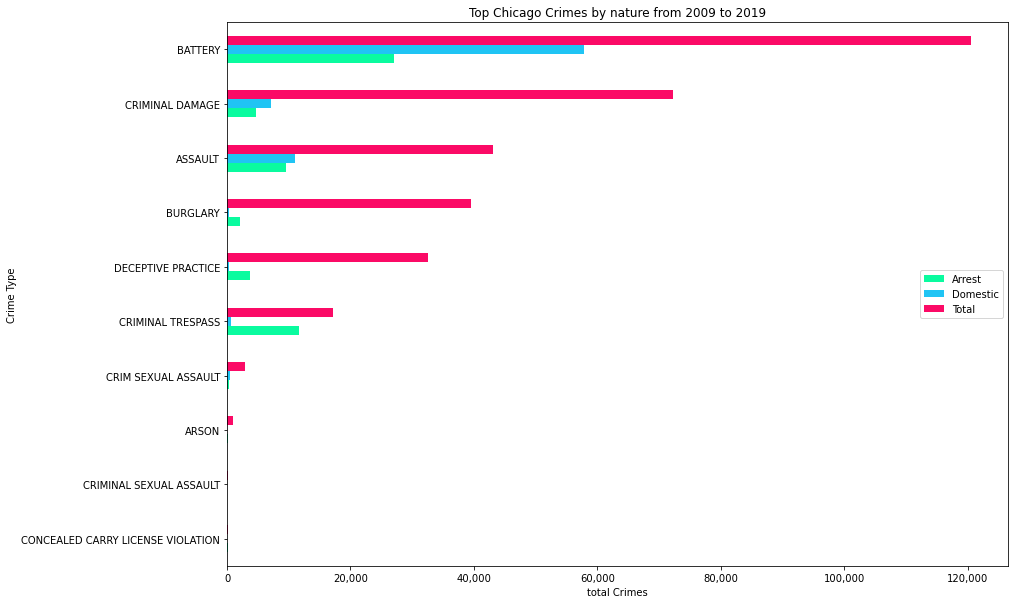

In [17]:
crime_type_counts[:10].sort_values(by='Total', ascending=True).plot(kind='barh', figsize=(14,10),color=['#0afb9f','#20c4f4','#fb0a66'])
plt.title('Top Chicago Crimes by nature from 2009 to 2019')
plt.xlabel('total Crimes')
plt.ylabel('Crime Type')
plt.legend(loc='right')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

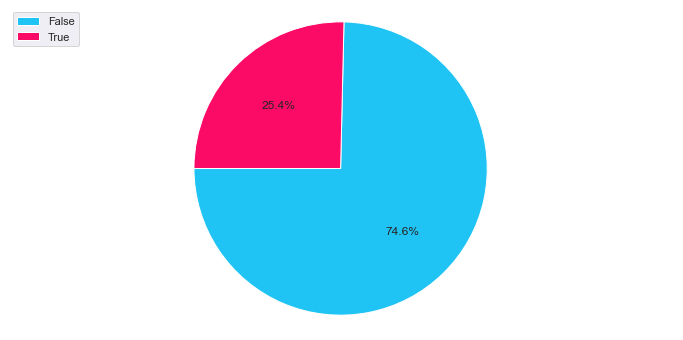

In [25]:
arrests = df['Arrest'].value_counts()
fig1, ax1 = plt.subplots()  
fig1 = plt.gcf()
fig1.set_size_inches(12, 6)
ax1.pie(arrests, labels=None, autopct="%1.1f%%", shadow=False, startangle=180,rotatelabels=True,colors=['#20c4f4','#fb0a66'])
plt.legend(arrests.index, loc='upper left')
ax1.axis("equal");
